In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import geopandas as gpd
import descartes
from shapely.geometry import Point , Polygon

import folium
from folium import plugins
import json

import seaborn as sns


In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import helper as H
import plot_helper as P

In [3]:
# read 2 rows of the file before loading it
!head -2 ../data/incident_reports.csv

Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,Report Type Code,Report Type Description,Filed Online,Incident Code,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140,VS,Vehicle Supplement,,07041,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000,Southern,Bayview Hunters Point,10,37.72171587946975,-122.39594382884452,"(37.72171587946975, -122.39594382884452)"


In [4]:
police_df = pd.read_csv('../data/incident_reports.csv')

In [5]:
police_df.head(2)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Incident Description,Resolution,Intersection,CNN,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,point
0,2018/01/01 09:26:00 AM,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,171052174,173641140.0,...,"Vehicle, Recovered, Auto",Open or Active,03RD ST \ HOLLISTER AVE,20471000.0,Southern,Bayview Hunters Point,10.0,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01 02:30:00 AM,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,180000768,180010668.0,...,"Burglary, Residence, Forcible Entry",Open or Active,LISBON ST \ PERSIA AVE,21719000.0,Ingleside,Excelsior,11.0,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [6]:
# replace NaN values with 0
police_df= police_df.fillna(0)

In [7]:
unwanted= ['Incident Datetime', 'Report Type Code' , 'Report Type Description' , 'CAD Number' , 'CNN', 
                              'Supervisor District' , 'Resolution', 'Filed Online', 'Incident Number',
                              'Incident Code' , 'Police District']
extract= H.extract_df(police_df, unwanted)

In [8]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018/01/01,09:26,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018/01/01,02:30,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


In [9]:
extract = H.to_datetime(extract,'Incident Date' , 'Incident Time')

In [10]:
extract.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 09:26:00,2018,Monday,2018/01/01 09:27:00 AM,61893007041,618930,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Auto",03RD ST \ HOLLISTER AVE,Bayview Hunters Point,37.721716,-122.395944,"(37.72171587946975, -122.39594382884452)"
1,2018-01-01,1900-01-01 02:30:00,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"


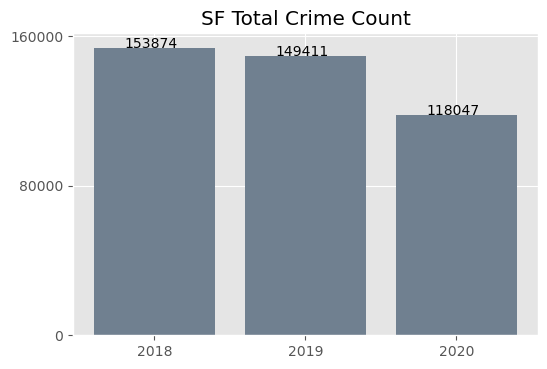

In [11]:
H.plot_crime_per_year(extract, [2018,2019, 2020], 'Incident Year');

In [12]:
df_2018 = H.crime_per_year(extract, 2018, 'Incident Year')

In [13]:
df_2019 = H.crime_per_year(extract , 2019, 'Incident Year')

In [14]:
df_2020 = H.crime_per_year(extract , 2020, 'Incident Year')

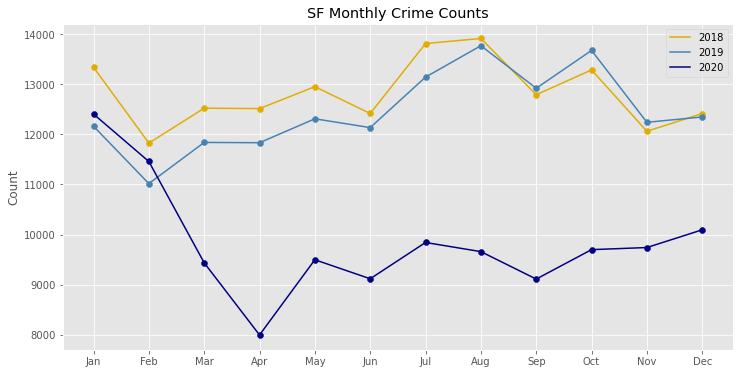

In [15]:
# plotting crime per month
P.plot_crime_by_month(extract , 'Incident Date');

In [16]:
# counts per category for each year (3 subplots)

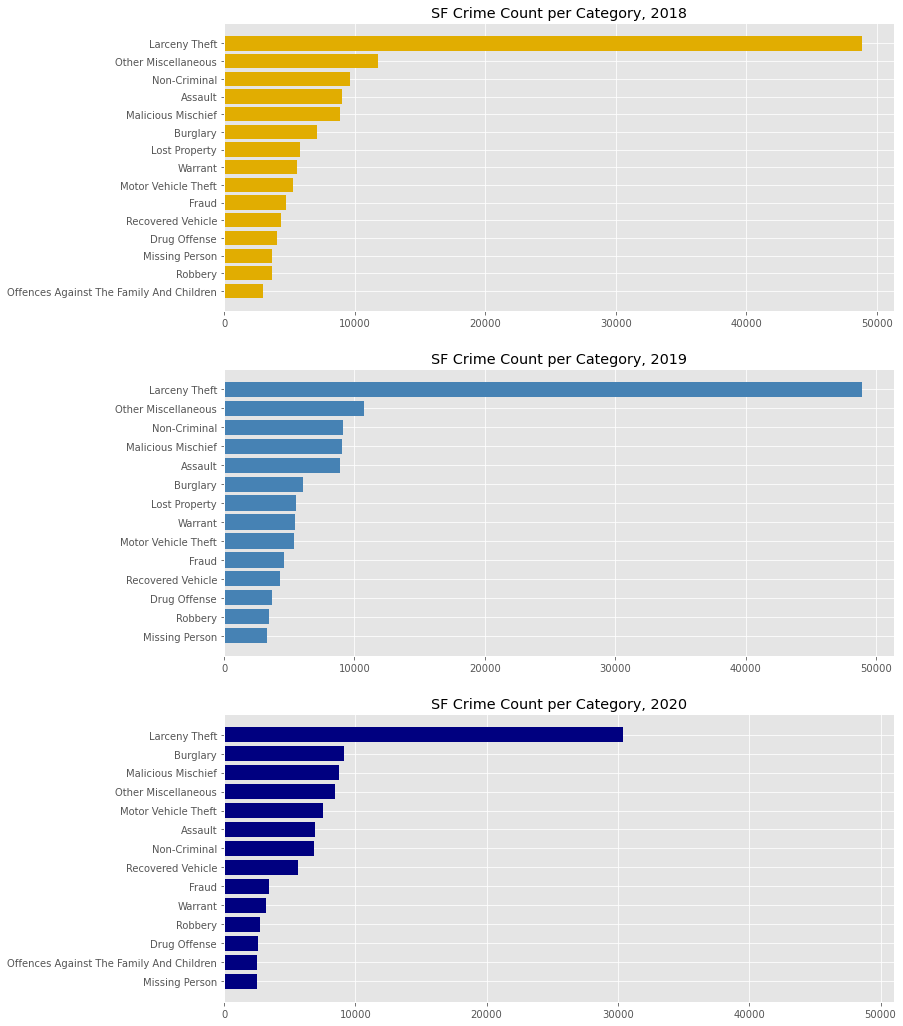

In [17]:
P.plot_cats_per_year(extract , 'Incident Date', 'Incident Category');

In [18]:
# comparing 3 years , voilent vs property

In [19]:
violent_df= H.violent_(extract)

In [20]:
violent_df

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 01:30:00,2018,Monday,2018/01/01 01:44:00 AM,61893704136,618937,Assault,Simple Assault,Battery with Serious Injuries,CALIFORNIA ST \ DRUMM ST,Financial District/South Beach,37.793664,-122.396390,"(37.793663777154755, -122.39639041612962)"
1,2018-01-01,1900-01-01 09:00:00,2018,Monday,2018/01/01 10:14:00 AM,61894004013,618940,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",LAKEVIEW AVE \ MAJESTIC AVE,Oceanview/Merced/Ingleside,37.716978,-122.451895,"(37.7169775067907, -122.45189499287864)"
2,2018-01-01,1900-01-01 10:45:00,2018,Monday,2018/01/01 11:30:00 AM,61894803044,618948,Robbery,Robbery - Commercial,"Robbery, Chain Store, W/ Force",OFARRELL ST \ SECURITY PACIFIC PL,Financial District/South Beach,37.786748,-122.405346,"(37.786747617678444, -122.40534607993492)"
3,2018-01-01,1900-01-01 13:45:00,2018,Monday,2018/01/01 03:15:00 PM,61900304013,619003,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",GENEVA AVE \ NAPLES ST,Excelsior,37.714209,-122.436176,"(37.714209482735754, -122.43617646639477)"
4,2018-01-01,1900-01-01 14:15:00,2018,Monday,2018/01/01 02:51:00 PM,61900504138,619005,Assault,Simple Assault,"Battery, former Spouse or Dating Relationship",SOUTH VAN NESS AVE \ 26TH ST,Mission,37.749172,-122.415955,"(37.749172182064, -122.41595464350685)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62150,2020-11-24,1900-01-01 21:41:00,2020,Tuesday,2020/11/24 09:41:00 PM,101580815200,1015808,Offences Against The Family And Children,Other,Domestic Violence (secondary only),FILLMORE ST \ TURK ST,Western Addition,37.780496,-122.432140,"(37.78049625961115, -122.43214039079034)"
62151,2021-03-24,1900-01-01 05:44:00,2021,Wednesday,2021/03/24 05:46:00 AM,101573803071,1015738,Robbery,Robbery - Other,"Robbery, W/ Gun",ARGUELLO BLVD \ LAKE ST,Presidio Heights,37.786914,-122.459280,"(37.78691386952736, -122.45927952860882)"
62152,2021-03-24,1900-01-01 08:59:00,2021,Wednesday,2021/03/24 08:59:00 AM,101580616010,1015806,Drug Offense,Drug Violation,Marijuana Offense,HILL ST \ SANCHEZ ST,Noe Valley,37.755556,-122.430038,"(37.75555614570098, -122.43003800709896)"
62153,2021-03-22,1900-01-01 07:52:00,2021,Monday,2021/03/22 07:57:00 AM,101573604013,1015736,Assault,Aggravated Assault,"Assault, Aggravated, W/ Other Weapon",WASHINGTON ST \ POLK ST,Russian Hill,37.793258,-122.421230,"(37.7932578668955, -122.42122998219767)"


In [21]:
property_df= H.property_(extract)

In [22]:
property_df

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2018-01-01,1900-01-01 02:30:00,2018,Monday,2018/01/01 08:21:00 AM,61893105041,618931,Burglary,Burglary - Residential,"Burglary, Residence, Forcible Entry",LISBON ST \ PERSIA AVE,Excelsior,37.722000,-122.433606,"(37.722000219874225, -122.43360633930074)"
1,2018-01-01,1900-01-01 03:00:00,2018,Monday,2018/01/01 10:57:00 AM,61893906243,618939,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, $200-$950",08TH ST \ MISSION ST,South of Market,37.777457,-122.413158,"(37.77745741894575, -122.4131576926893)"
2,2018-01-01,1900-01-01 09:50:00,2018,Monday,2018/01/01 11:35:00 AM,61894205153,618942,Burglary,Burglary - Other,"Burglary, Non-residential, Unlawful Entry",20TH AVE \ BUCKINGHAM WAY \ WINSTON DR,Lakeshore,37.730119,-122.475937,"(37.73011880465789, -122.47593733565002)"
3,2018-01-01,1900-01-01 08:17:00,2018,Monday,2018/01/01 08:28:00 AM,61894406244,618944,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",ELLIS ST \ WEBSTER ST,Western Addition,37.782570,-122.430798,"(37.782569887796356, -122.43079788213421)"
4,2018-01-01,1900-01-01 14:50:00,2018,Monday,2018/01/01 02:55:00 PM,61900106244,619001,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",FRONT ST \ GREEN ST,Financial District/South Beach,37.800607,-122.400250,"(37.800607119774014, -122.40025046404315)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179590,2021-03-24,1900-01-01 01:31:00,2021,Wednesday,2021/03/24 01:31:00 AM,101569426030,1015694,Arson,Arson,Arson,UNDERWOOD AVE \ INGALLS ST,Bayview Hunters Point,37.726606,-122.386242,"(37.72660616397755, -122.38624189370873)"
179591,2021-03-20,1900-01-01 15:00:00,2021,Saturday,2021/03/20 07:45:00 PM,101571406244,1015714,Larceny Theft,Larceny - From Vehicle,"Theft, From Locked Vehicle, >$950",STOCKTON ST \ OFARRELL ST,Financial District/South Beach,37.786615,-122.406399,"(37.786615346301794, -122.40639887891692)"
179592,2021-03-21,1900-01-01 17:00:00,2021,Sunday,2021/03/24 08:00:00 PM,101591706374,1015917,Larceny Theft,Larceny Theft - Other,"Theft, Other Property, >$950",21ST ST \ HAMPSHIRE ST,Mission,37.757705,-122.407754,"(37.75770485523657, -122.40775446504674)"
179593,2021-03-24,1900-01-01 00:00:00,2021,Wednesday,2021/03/24 10:24:00 AM,101576107025,1015761,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Truck",24TH ST \ HOFFMAN AVE,Noe Valley,37.750902,-122.440616,"(37.7509020971662, -122.44061600568222)"


In [23]:
# df of property crimes per year, march-dec

property_ma_20 = H.property_after_date(property_df , 2020,2)
property_ma_19 = H.property_after_date(property_df, 2019,2)
property_ma_18 = H.property_after_date(property_df, 2018,2)

In [24]:
# df of violent crimes per year, march-dec

violent_ma_20 = H.violent_after_date(violent_df , 2020,2)
violent_ma_19 = H.violent_after_date(violent_df, 2019,2)
violent_ma_18 = H.violent_after_date(violent_df, 2018,2)

In [155]:
extract[(extract['Incident Year']==2020) & (extract['Incident Category']== 'Arson') & (extract['Incident Date'].dt.month >2 )].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 11437 to 419153
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Incident Date          380 non-null    datetime64[ns]
 1   Incident Time          380 non-null    datetime64[ns]
 2   Incident Year          380 non-null    int64         
 3   Incident Day of Week   380 non-null    object        
 4   Report Datetime        380 non-null    object        
 5   Row ID                 380 non-null    int64         
 6   Incident ID            380 non-null    int64         
 7   Incident Category      380 non-null    object        
 8   Incident Subcategory   380 non-null    object        
 9   Incident Description   380 non-null    object        
 10  Intersection           380 non-null    object        
 11  Analysis Neighborhood  380 non-null    object        
 12  Latitude               380 non-null    float64       
 13

In [25]:
violent_ma_20.groupby('Incident Category').count().sort_values(by='Row ID').reset_index(drop= False)

,Incident Category,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,Homicide,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,Rape,15,15,15,15,15,15,15,15,15,15,15,15,15,15
2,Traffic Violation Arrest,776,776,776,776,776,776,776,776,776,776,776,776,776,776
3,Drug Offense,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974,1974
4,Offences Against The Family And Children,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094
5,Robbery,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103,2103
6,Assault,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639,5639


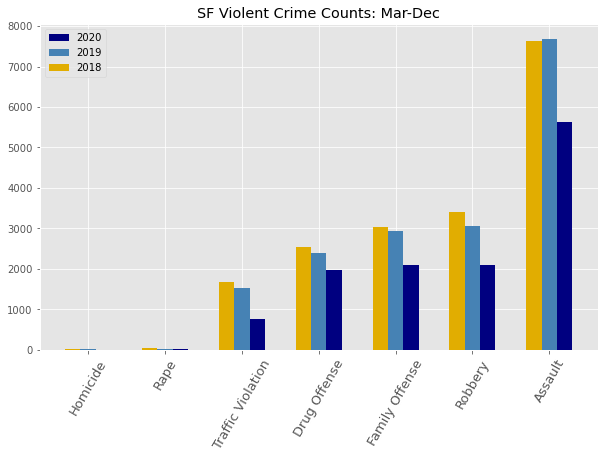

In [26]:
P.plot_violent_years(violent_ma_18, violent_ma_19, violent_ma_20);

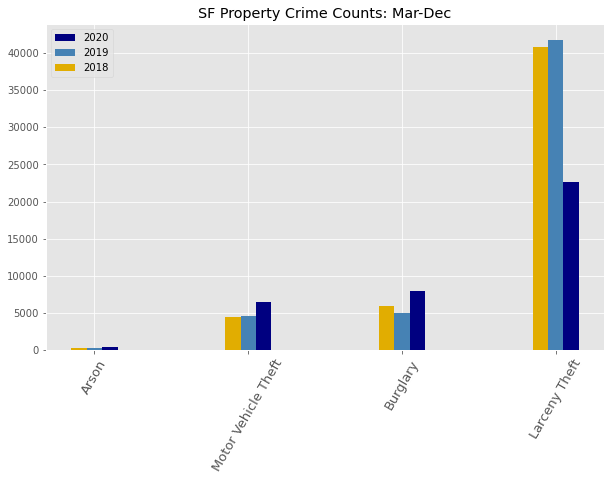

In [27]:
P.plot_prop_years(property_ma_18, property_ma_19, property_ma_20);

In [28]:
property_ma_19[property_ma_19['Incident Subcategory']=='Burglary - Hot Prowl']

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
206,2019-03-01,1900-01-01 01:05:00,2019,Friday,2019/03/01 01:07:00 AM,77508505083,775085,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Unlawful Entry",HILL ST \ SANCHEZ ST,Noe Valley,37.755556,-122.430038,"(37.75555614570098, -122.43003800709896)"
213,2019-03-01,1900-01-01 12:00:00,2019,Friday,2019/03/01 12:27:00 PM,77528705082,775287,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Att. Forcible Entry",LAKE ST \ 16TH AVE,Seacliff,37.786181,-122.475504,"(37.786181460770884, -122.47550391497087)"
237,2019-03-01,1900-01-01 01:05:00,2019,Friday,2019/03/01 01:07:00 AM,77542105083,775421,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Unlawful Entry",HILL ST \ SANCHEZ ST,Noe Valley,37.755556,-122.430038,"(37.75555614570098, -122.43003800709896)"
253,2019-03-01,1900-01-01 17:45:00,2019,Friday,2019/03/02 06:57:00 AM,77553405081,775534,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Forcible Entry",BENTON AVE \ END,Bernal Heights,37.732518,-122.426266,"(37.73251803986587, -122.426265956908)"
320,2019-03-03,1900-01-01 07:08:00,2019,Sunday,2019/03/03 07:12:00 AM,77580505083,775805,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Unlawful Entry",NEY ST \ CRAUT ST,Excelsior,37.730021,-122.428328,"(37.7300213924819, -122.4283280014735)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49726,2019-12-30,1900-01-01 19:00:00,2019,Monday,2019/12/31 10:02:00 AM,88661205083,886612,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Unlawful Entry",EDNA ST \ MONTEREY BLVD,West of Twin Peaks,37.731547,-122.447292,"(37.73154715242276, -122.44729182204992)"
49741,2019-12-30,1900-01-01 17:30:00,2019,Monday,2019/12/31 07:24:00 AM,88664805083,886648,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Unlawful Entry",STEINER ST \ GROVE ST,Hayes Valley,37.776550,-122.433029,"(37.776550121530626, -122.43302850011361)"
50812,2019-07-23,1900-01-01 01:00:00,2019,Tuesday,2019/07/23 08:14:00 AM,82562705083,825627,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Unlawful Entry",0,0,0.000000,0.000000,0
51014,2019-11-22,1900-01-01 00:00:00,2019,Friday,2019/11/22 12:00:00 AM,91867305083,918673,Burglary,Burglary - Hot Prowl,"Burglary, Hot Prowl, Unlawful Entry",FUNSTON AVE \ LINCOLN WAY,Golden Gate Park,37.765739,-122.470727,"(37.76573925273299, -122.47072725986746)"


/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


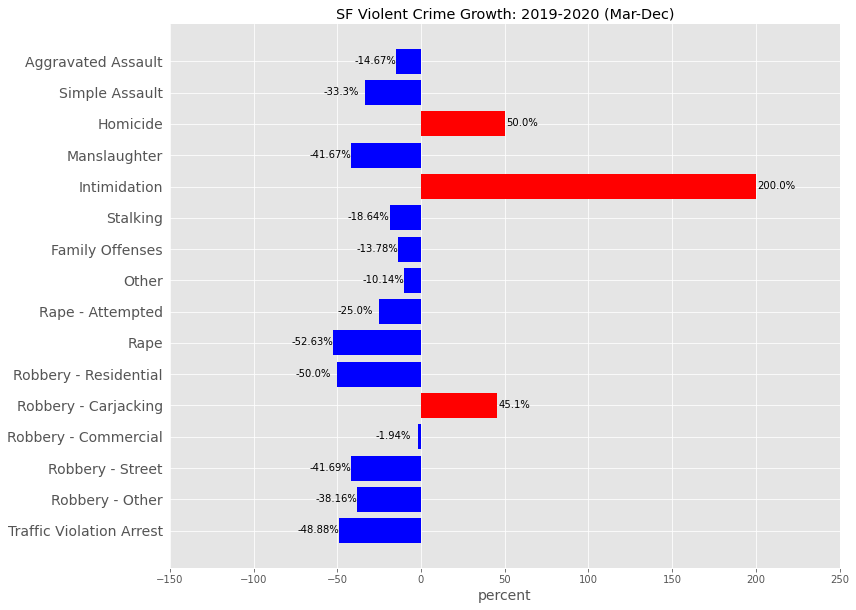

In [29]:
# review each category and sub category comparing 2020 and 2019
P.plot_viol_subcats(violent_ma_19, violent_ma_20);

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


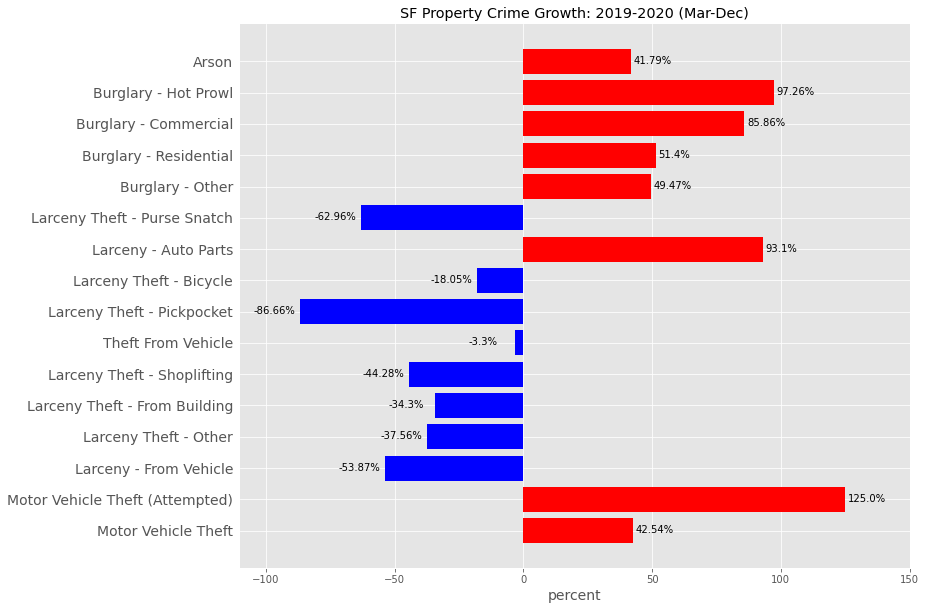

In [30]:
P.plot_prop_subcats(property_ma_19, property_ma_20);

In [31]:
# exctracting burgulary dataframe: 2020, march-dec:
burg_20 = extract[(extract['Incident Date'].dt.year ==2020) & (extract['Incident Date'].dt.month >2)& (extract['Incident Category'] == 'Burglary')].reset_index(drop= True)

In [32]:
burg_20.head(1)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2020-08-13,1900-01-01 03:26:00,2020,Thursday,2020/08/14 12:55:00 PM,95324605073,953246,Burglary,Burglary - Other,"Burglary, Other Bldg., Unlawful Entry",WALLER ST \ CARMELITA ST,Haight Ashbury,37.770646,-122.434405,"(37.770646047967126, -122.43440451408435)"


/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

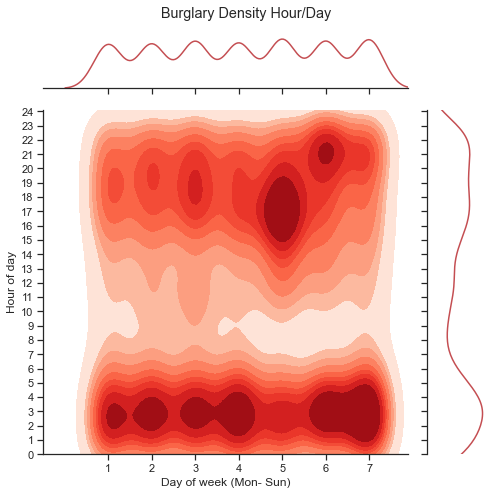

In [33]:
# joint map of burglary: day of the week and hour of day


ax = sns.set(style= 'ticks')
#sns.set(rc={'figure.figsize':(20,10)})


f= burg_20['Incident Day of Week'].replace({ 'Monday': 1 , 'Tuesday': 2, 'Wednesday':3 , 'Thursday':4, 'Friday': 5, 'Saturday':6, 'Sunday': 7} )
j= burg_20['Incident Time'].dt.hour


a= sns.jointplot(f , j, kind = 'kde', color = 'r', shade = True, cmap='Reds', height = 7, space = 0.5,  xlim=(-.5,7.9), ylim=(0,24.1))
a.ax_joint.set_xlabel('Day of week (Mon- Sun)')
a.ax_joint.set_ylabel('Hour of day')
a.ax_joint.set_xticks([ 1, 2, 3, 4, 5, 6,7])
a.ax_joint.set_yticks(range(25))

a.fig.suptitle('Burglary Density Hour/Day')

plt.tight_layout()
plt.savefig("../images/burg.png")


;

In [34]:
# exctracting Vehicle Theft dataframe: 2020, march-dec:
vtheft_20 = extract[(extract['Incident Date'].dt.year ==2020) & (extract['Incident Date'].dt.month >2)& (extract['Incident Category'] == 'Motor Vehicle Theft')].reset_index(drop= True)

In [35]:
vtheft_20.head(1)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
0,2020-08-16,1900-01-01 21:18:00,2020,Sunday,2020/08/16 09:29:00 PM,95339807021,953398,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen, Auto",MISSION ST \ ANNIE ST,Financial District/South Beach,37.786852,-122.401262,"(37.786851714583754, -122.40126150328634)"


In [36]:
# viridis - 

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


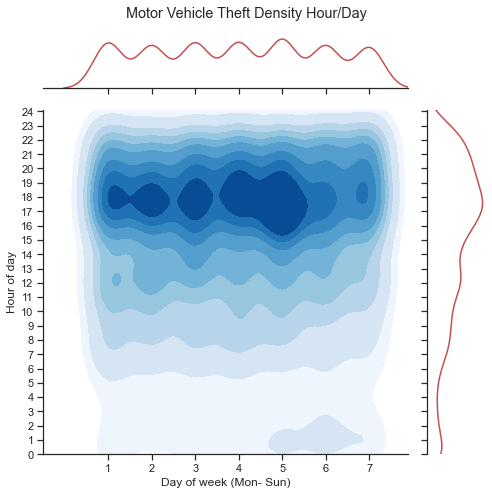

In [37]:
# joint map of vehicle theft: day of the week and hour of day


ax = sns.set(style= 'ticks')
#sns.set(rc={'figure.figsize':(20,10)})


f= vtheft_20['Incident Day of Week'].replace({ 'Monday': 1 , 'Tuesday': 2, 'Wednesday':3 , 'Thursday':4, 'Friday': 5, 'Saturday':6, 'Sunday': 7} )
j= vtheft_20['Incident Time'].dt.hour

a= sns.jointplot(f , j, kind = 'kde', color = 'r', shade = True, cmap='Blues', height = 7, space = 0.5,  xlim=(-.5,7.9), ylim=(0,24.1))
a.ax_joint.set_xticks([ 1, 2, 3, 4, 5, 6,7])
a.ax_joint.set_xlabel('Day of week (Mon- Sun)')
a.ax_joint.set_ylabel('Hour of day')
a.ax_joint.set_yticks(range(25))

a.fig.suptitle('Motor Vehicle Theft Density Hour/Day')
#a.ax_joint.collections[0].set_alpha(0)
#a.fig.tight_layout()

plt.tight_layout()
plt.savefig("../images/vtheft.png");

In [38]:
mission_burg= burg_20[burg_20['Analysis Neighborhood'] == 'Mission']

In [109]:
mission_vtheft= vtheft_20[vtheft_20['Analysis Neighborhood'] == 'Mission']

In [39]:
mission_burg.head(2)

,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Category,Incident Subcategory,Incident Description,Intersection,Analysis Neighborhood,Latitude,Longitude,point
5,2020-08-07,1900-01-01 20:30:00,2020,Friday,2020/08/16 09:20:00 PM,95339305013,953393,Burglary,Burglary - Residential,"Burglary, Apartment House, Unlawful Entry",ALBION ST \ 16TH ST,Mission,37.764843,-122.423112,"(37.76484329795315, -122.42311242181232)"
10,2020-08-07,1900-01-01 08:45:00,2020,Friday,2020/08/16 09:47:00 AM,95328405071,953284,Burglary,Burglary - Other,"Burglary, Other Bldg., Forcible Entry",20TH ST \ LEXINGTON ST,Mission,37.758545,-122.420507,"(37.758544720385714, -122.42050683395422)"


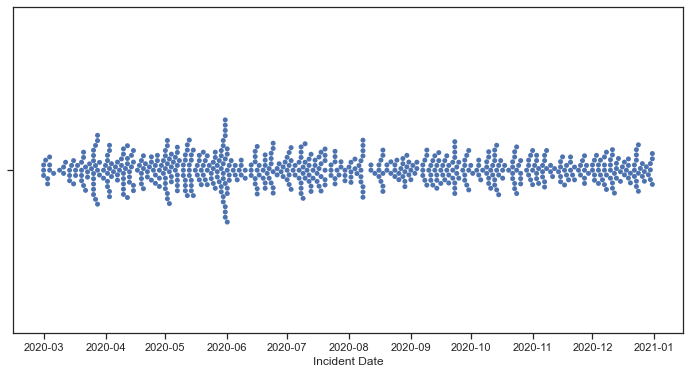

In [40]:
fig, ax  = plt.subplots(figsize = (12, 6))
ax = sns.swarmplot(x=mission_burg["Incident Date"])

In [90]:
mission_burg_g= mission_burg.groupby(['Intersection' , 'Latitude', 'Longitude']).count().reset_index()
#.sort_values(by = 'Row ID', ascending = False)

In [111]:
mission_vtheft_g = mission_vtheft.groupby(['Intersection' , 'Latitude', 'Longitude']).count().reset_index()

In [92]:
df_1 = mission_burg_g.sort_values(by = 'Row ID', ascending = False).reset_index(drop = True).iloc[:, :4]

In [93]:
df_1

,Intersection,Latitude,Longitude,Incident Date
0,11TH ST \ HARRISON ST,37.770630,-122.412480,18
1,22ND ST \ GUERRERO ST,37.755170,-122.423181,13
2,PAGE ST \ 12TH ST \ MARKET ST,37.774359,-122.420254,12
3,23RD ST \ MISSION ST,37.753837,-122.418594,12
4,15TH ST \ MISSION ST,37.766674,-122.419825,11
...,...,...,...,...
231,FOLSOM ST \ 22ND ST,37.755699,-122.414388,1
232,FOLSOM ST \ NORFOLK ST,37.771405,-122.414526,1
233,22ND ST \ BRYANT ST,37.755998,-122.409433,1
234,22ND ST \ CAPP ST,37.755502,-122.417659,1


In [112]:
df_2 = mission_vtheft_g.sort_values(by = 'Row ID', ascending = False).reset_index(drop = True).iloc[:, :4]

In [113]:
df_2

,Intersection,Latitude,Longitude,Incident Date
0,ALAMEDA ST \ BRYANT ST,37.768178,-122.410731,26
1,11TH ST \ HARRISON ST,37.770630,-122.412480,13
2,SOUTH VAN NESS AVE \ 14TH ST,37.768405,-122.417802,10
3,JULIAN AVE \ 16TH ST,37.764977,-122.420901,10
4,VALENCIA ST \ MCCOPPIN ST,37.771595,-122.422526,10
...,...,...,...,...
258,ALVARADO ST \ SAN JOSE AVE,37.754466,-122.421477,1
259,BARTLETT ST \ 25TH ST,37.750573,-122.419400,1
260,BIRD ST \ DEARBORN ST,37.762229,-122.422980,1
261,CAPP ST \ 19TH ST,37.760301,-122.418118,1


In [142]:
miss_coords= (37.7599, -122.4148)
m = folium.Map(location = miss_coords, zoom_start=15, tiles='Cartodb Positron')

folium.PolyLine(coor_barax, color= "black", weight=2.5, opacity=1).add_to(m)

for i in range(0,len(df_1)):
    
    folium.Circle(
      location=[df_1.iloc[i]['Latitude'], df_1.iloc[i]['Longitude']],
      popup=df_1.iloc[i]['Intersection' ],
      radius=float(df_1.iloc[i]['Incident Date'])*5,
      color='crimson',
      fill=True,
      fill_color='crimson',
      name = 'Burglary Nodes'
    ).add_to(m)
    
for i in range(0,len(df_2)):
    
    folium.Circle(
      location=[df_2.iloc[i]['Latitude'], df_2.iloc[i]['Longitude']],
      popup=df_2.iloc[i]['Intersection' ],
      radius=float(df_2.iloc[i]['Incident Date'])*5,
      color='navy',
      fill=True,
      fill_color='navy',
      name = 'Vtheft Nodes'
    ).add_to(m)
    
    

#folium.LayerControl().add_to(m)

folium.map.LayerControl('topright', collapsed=False).add_to(m)
m.save('../images/mission.html')  
m

In [135]:
coor= [[-122.41095899969652,37.76943300044438],[-122.41093100020761,37.769410999642986],[-122.41090799997778,37.76942900029767],[-122.41088599991679,37.76944700005473],[-122.40973600056184,37.770349000005766],[-122.40903500016421,37.769792999593676],[-122.40843600020258,37.769317999707376],[-122.40800700007466,37.76924399995716],[-122.40789500023209,37.76934299991101],[-122.40773900022478,37.76946600018427],[-122.40763999957679,37.769544999700884],[-122.40762299961686,37.76955799998237],[-122.40758699953828,37.769586000260034],[-122.40700100015842,37.77005000013585],[-122.40621300047536,37.76946300013261],[-122.4059390005741,37.769659000295114],[-122.40584399996843,37.76966500002409],[-122.40558899994181,37.76968000026003],[-122.40540800025224,37.769689999772275],[-122.40520300037058,37.76970200008818],[-122.40498999944754,37.76971499992365],[-122.40487499967111,37.76853100040899],[-122.40474999971579,37.767257000072725],[-122.40462299963116,37.765958000438644],[-122.40449699949635,37.764664000456285],[-122.40483999959821,37.76464300021397],[-122.4050899999291,37.764628000106],[-122.40506000001498,37.76431100005319],[-122.40510499977647,37.76385199978387],[-122.40520300010361,37.76347799984305],[-122.40525800003056,37.76332300011574],[-122.40532400053856,37.763137000028614],[-122.40538400037079,37.76296999991264],[-122.40565400055671,37.76243299969862],[-122.40592600016824,37.76201199987511],[-122.40602200002881,37.76186300031313],[-122.4061470001775,37.76163799978363],[-122.40628300049691,37.76139299982541],[-122.40648000041257,37.760730999544336],[-122.40649299998017,37.760685999686466],[-122.40649199992218,37.76025499979655],[-122.40638900028321,37.759803999802564],[-122.40626200021022,37.75945199996896],[-122.40624399997421,37.75942200028983],[-122.40610400042709,37.75919599972451],[-122.40590299961292,37.75893400040529],[-122.40554499975511,37.75853699994637],[-122.40504800024297,37.75818900042262],[-122.40483599964207,37.75803400020774],[-122.4044420001742,37.75774799994616],[-122.40416900006676,37.75752999961382],[-122.4037740001741,37.75713799957894],[-122.4036889997947,37.75701500012038],[-122.40354399953654,37.756803999745614],[-122.40339600041351,37.75647100031058],[-122.40330600044193,37.75616600033068],[-122.40324500003837,37.75576000029501],[-122.40312700021245,37.75447800022163],[-122.40301100034945,37.75320200027001],[-122.40297799990577,37.75275000028274],[-122.40300700011221,37.75244600011574],[-122.40316899990486,37.7519089998425],[-122.40322499976487,37.751722000318885],[-122.4032599997994,37.75162399991251],[-122.40335699970656,37.75135100002875],[-122.40337700025204,37.750930999658905],[-122.40330899986995,37.750885000279034],[-122.40351399987921,37.75028199984278],[-122.4037360004389,37.74958399996036],[-122.40378399961243,37.749432999581174],[-122.40430600010491,37.749319000406075],[-122.40477700042716,37.749217000152406],[-122.40481000022002,37.74920999961347],[-122.4048080000313,37.749235000201274],[-122.4048870001828,37.74921299972014],[-122.40502499988669,37.7491779997522],[-122.40509199943979,37.74915399956141],[-122.40523900007837,37.74912500013903],[-122.40550100031092,37.749081000418066],[-122.40568199954693,37.74904400031331],[-122.40631199955739,37.74893899986727],[-122.40649899952452,37.74888499996543],[-122.40672800022428,37.7488189999828],[-122.4067579997854,37.74876599965623],[-122.40689200054997,37.74877200004645],[-122.40715200054046,37.748685000282876],[-122.40777400032441,37.74847499960033],[-122.40788199997928,37.7484050000073],[-122.40807000021164,37.74839799978283],[-122.4086039995914,37.74840199998629],[-122.40870600034212,37.748352999663545],[-122.40885399961527,37.74839699990414],[-122.40954699957254,37.74838500013833],[-122.40964599961983,37.74833400004449],[-122.40974900000218,37.748379999987705],[-122.41044900040221,37.748365000265586],[-122.41054599993376,37.74831699955356],[-122.41065400046959,37.74836299965998],[-122.41134600057224,37.74834400033542],[-122.41148399995373,37.748297999649054],[-122.41162800041087,37.74834099965758],[-122.4125889999556,37.748321999980476],[-122.41353599999383,37.74830400024126],[-122.41366899946622,37.748254999592845],[-122.41381799945616,37.748292000146385],[-122.41482600011912,37.748273000241184],[-122.4149189996829,37.74823099992062],[-122.41502599947134,37.74826699976421],[-122.41572799970014,37.748255000305754],[-122.41586300017671,37.74821200010217],[-122.4160089996925,37.7482509996289],[-122.41804700051205,37.74821099954374],[-122.41822100044091,37.748166000096106],[-122.4183569994665,37.74819800021692],[-122.41917099974708,37.7481790001454],[-122.42013900047063,37.748157000392084],[-122.42027899960429,37.748124999564105],[-122.42046999967351,37.748161000031345],[-122.4212990001822,37.748142999795895],[-122.42139299943432,37.748123999718075],[-122.42230000034134,37.74807000014725],[-122.42248700031783,37.74801299971173],[-122.422877999512,37.74794800028456],[-122.42458399978253,37.74784700003709],[-122.42476800004648,37.74782999973639],[-122.42486299991823,37.74793900009896],[-122.4249180003796,37.74851200022902],[-122.42484500009398,37.748633000253214],[-122.42477299989831,37.748752000300456],[-122.42483000006217,37.749330999611075],[-122.42492299965825,37.749435000176305],[-122.42485099998963,37.749547999897295],[-122.4248690001743,37.74972499975222],[-122.42490799952544,37.75012500021116],[-122.42499899951841,37.75023299966144],[-122.42492999960164,37.750349000140226],[-122.42498700036532,37.75092600033739],[-122.4250759994601,37.751032999614644],[-122.42500899996891,37.75114899988009],[-122.42506600008569,37.751724000179415],[-122.42515300046206,37.75184199992317],[-122.42508600032808,37.7519289997931],[-122.4251550002187,37.75262700011407],[-122.42522799991362,37.75335600010854],[-122.42530300041265,37.75343199966673],[-122.4252360001552,37.753518999579796],[-122.42537800019207,37.75494499996147],[-122.42545699985786,37.75502900002869],[-122.42538600054415,37.75512199986213],[-122.42552799953599,37.75654900014145],[-122.42561200047562,37.75663099970136],[-122.42554999976474,37.75671999983951],[-122.42560499964176,37.75734700017382],[-122.42568900025643,37.75743000004464],[-122.425627000284,37.75751799983403],[-122.42568300031785,37.758144999947106],[-122.42576699985229,37.75822700033045],[-122.42569200017344,37.758349000224655],[-122.42574599953674,37.75891200026645],[-122.4258430000488,37.75902899978237],[-122.42576900033166,37.75915399974488],[-122.42582199982203,37.759710000024725],[-122.42591999991141,37.75983000043512],[-122.4258459994904,37.75994900010024],[-122.42597899961014,37.761314999956156],[-122.4260770001144,37.76142700009788],[-122.42600199998357,37.761549000084784],[-122.42605399995887,37.762102000033615],[-122.42614600048779,37.76215999969426],[-122.42606499976212,37.76222199985883],[-122.42610400028242,37.76263099974721],[-122.4261310002395,37.762911999793054],[-122.42622799943146,37.76303099973758],[-122.42615299960126,37.76314999959611],[-122.42622600036549,37.76391600026974],[-122.42631700046427,37.76397000032873],[-122.42624000021766,37.764060000088236],[-122.42628199987898,37.76450599997339],[-122.42638200035921,37.764645999649154],[-122.42630900029822,37.76479199987158],[-122.42639800006752,37.765711000307796],[-122.42649100006845,37.76577399959701],[-122.42641000042065,37.7658350004292],[-122.42644399957267,37.766184999562164],[-122.42653800030841,37.76626800036458],[-122.42646099969247,37.76636100036555],[-122.42652400006395,37.7670130001286],[-122.42661600042108,37.767070000028156],[-122.42653499996128,37.767127999861714],[-122.42659599944433,37.76775800010046],[-122.42669300030515,37.76786900042236],[-122.42661800052146,37.7679900002148],[-122.42671299991707,37.76898199989395],[-122.42685800050366,37.76904199954658],[-122.42694800056495,37.76917500022637],[-122.42655500055683,37.769484999847016],[-122.4263090001491,37.76960300010809],[-122.42628499996849,37.76968400008577],[-122.42495799980635,37.77072600020938],[-122.424853000398,37.77074800033911],[-122.42482900052963,37.77082899996692],[-122.42400800017654,37.771473999776184],[-122.42372500041824,37.77169599964352],[-122.4236199995259,37.77171700011694],[-122.42359600029306,37.77179800034377],[-122.42326700026557,37.77205799975336],[-122.42273199952469,37.772479999865624],[-122.42261999961212,37.77250299983142],[-122.42259500037851,37.77258700006489],[-122.42218599971176,37.772908999893374],[-122.42205099951369,37.77301600017694],[-122.42194099981572,37.77303600005582],[-122.42191600006149,37.7731230002854],[-122.42108899962406,37.77377499965781],[-122.4208080001382,37.77399700010538],[-122.42069900010192,37.77400800006738],[-122.4206749997271,37.77408699981931],[-122.42038599956041,37.77431600044582],[-122.42025400034952,37.774359000176936],[-122.42023099965834,37.77443799976193],[-122.4193569999576,37.77512800012117],[-122.41925600041813,37.77514700013959],[-122.41916799985066,37.77527799990682],[-122.41870400041417,37.77564499965146],[-122.4186589994612,37.7755580003917],[-122.41751499960586,37.77465100019064],[-122.41710400013055,37.774324999635866],[-122.4165759997702,37.77390600001707],[-122.41610400001355,37.77353200036078],[-122.41556099974696,37.77310099980599],[-122.41500199976375,37.77264899973634],[-122.41439199964262,37.77215799967324],[-122.41402700056663,37.771863999964154],[-122.41248000022547,37.770629999846435],[-122.41098900032163,37.76945599978913],[-122.41095899969652,37.76943300044438]]

In [136]:
coor_barax= []
for i in coor:
    coor_barax.append(i[::-1])

In [137]:
coor_barax

[[37.76943300044438, -122.41095899969652],
 [37.769410999642986, -122.41093100020761],
 [37.76942900029767, -122.41090799997778],
 [37.76944700005473, -122.41088599991679],
 [37.770349000005766, -122.40973600056184],
 [37.769792999593676, -122.40903500016421],
 [37.769317999707376, -122.40843600020258],
 [37.76924399995716, -122.40800700007466],
 [37.76934299991101, -122.40789500023209],
 [37.76946600018427, -122.40773900022478],
 [37.769544999700884, -122.40763999957679],
 [37.76955799998237, -122.40762299961686],
 [37.769586000260034, -122.40758699953828],
 [37.77005000013585, -122.40700100015842],
 [37.76946300013261, -122.40621300047536],
 [37.769659000295114, -122.4059390005741],
 [37.76966500002409, -122.40584399996843],
 [37.76968000026003, -122.40558899994181],
 [37.769689999772275, -122.40540800025224],
 [37.76970200008818, -122.40520300037058],
 [37.76971499992365, -122.40498999944754],
 [37.76853100040899, -122.40487499967111],
 [37.767257000072725, -122.40474999971579],
 [3